In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [26]:
from google.colab import files
uploaded = files.upload()

In [27]:
df=pd.read_csv('purchase.csv')
print(df)

   ID  Age  Gender  Income Education Marital Status Purchased
0   1   22    Male      35  Bachelor         Single        No
1   2   25  Female      40    Master         Single       Yes
2   3   47    Male      85       PhD        Married       Yes
3   4   52  Female     110  Bachelor        Married        No
4   5   46    Male      78    Master        Married       Yes
5   6   56  Female      95  Bachelor         Single        No
6   7   35  Female      60       PhD        Married       Yes
7   8   33    Male      58  Bachelor         Single        No
8   9   29  Female      45    Master         Single       Yes
9  10   41    Male      80       PhD        Married       Yes


In [28]:
le=LabelEncoder()
df['Age']=le.fit_transform(df['Age'])
df['Gender']=le.fit_transform(df['Gender'])
df['Income']=le.fit_transform(df['Income'])
df['Education']=le.fit_transform(df['Education'])
df['Marital Status']=le.fit_transform(df['Marital Status'])
df['Purchased']=le.fit_transform(df['Purchased'])

In [29]:
df


,ID,Age,Gender,Income,Education,Marital Status,Purchased
0,1,0,1,0,0,1,0
1,2,1,0,1,1,1,1
2,3,7,1,7,2,0,1
3,4,8,0,9,0,0,0
4,5,6,1,5,1,0,1
5,6,9,0,8,0,1,0
6,7,4,0,4,2,0,1
7,8,3,1,3,0,1,0
8,9,2,0,2,1,1,1
9,10,5,1,6,2,0,1


In [30]:
df=df.drop(['ID'], axis=1)

In [31]:
df

,Age,Gender,Income,Education,Marital Status,Purchased
0,0,1,0,0,1,0
1,1,0,1,1,1,1
2,7,1,7,2,0,1
3,8,0,9,0,0,0
4,6,1,5,1,0,1
5,9,0,8,0,1,0
6,4,0,4,2,0,1
7,3,1,3,0,1,0
8,2,0,2,1,1,1
9,5,1,6,2,0,1


In [40]:
independent=df.drop(['Purchased'],  axis='columns')
dependent=df['Purchased']

In [41]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(independent,dependent, test_size=0.3, random_state=42)

In [51]:
model=RandomForestClassifier(n_estimators=5)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [52]:
y_pred=model.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy ={accuracy * 100:.2f}%')

Accuracy =71.43%


In [54]:
new_data=[[2, 1, 0, 1, 2]]
prediction=model.predict(new_data)
print("prediction(0=No,1=Yes):",prediction[0])

prediction(0=No,1=Yes): 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [57]:
from sklearn.tree import export_text
Feature_names=['Age','Gender','Income','Education','Marital Status']

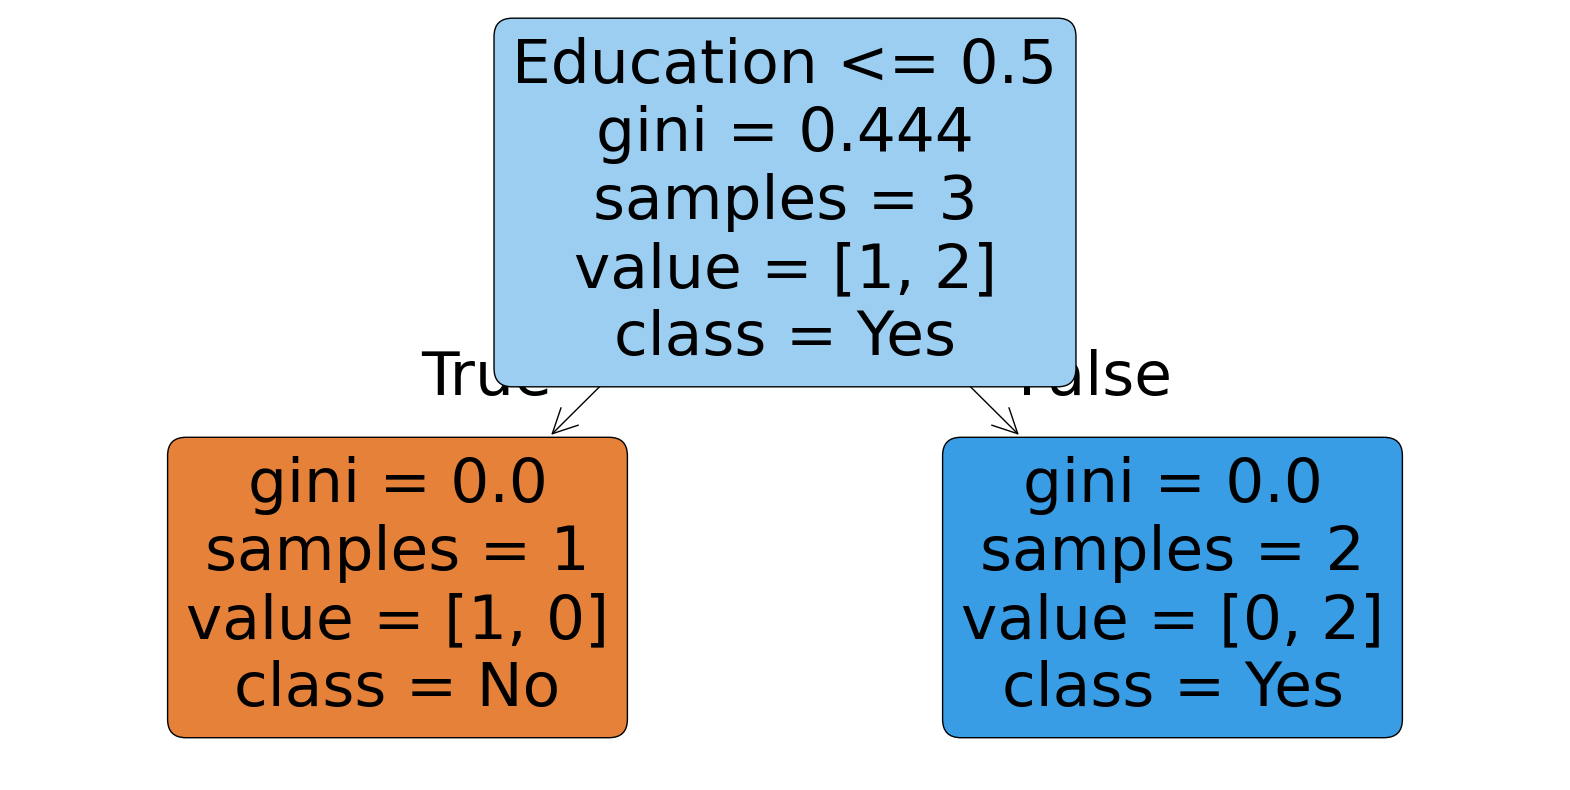

In [59]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Access the first decision tree in the forest
tree = model.estimators_[0]

plt.figure(figsize=(20, 10))
# Plot the individual tree
plot_tree(tree,
          feature_names=Feature_names,
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True)
plt.show()